In [1]:
%matplotlib inline
import matplotlib.patches as mpatches
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import IsolationForest

from ssi_forest import SemiSupervisedIsolationForest

In [2]:
COLORS = {-1: 'red', 1: 'blue'}

In [3]:
def generate_inliers(n, rng):
    return rng.uniform([0, 0], [0.5, 0.5], (n, 2))


def generate_outliers(n, rng, loc=[1, 1]):
    return rng.normal(loc, 0.1, (n, 2))

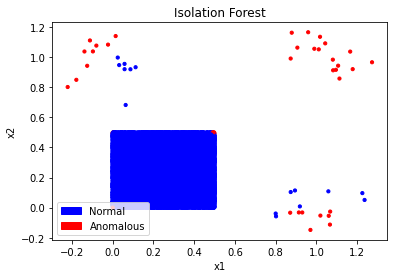

In [4]:
n_inliers = 1 << 16
n_outliers = 1 << 4
rng = np.random.default_rng(0)

x = np.concatenate([generate_inliers(n_inliers, rng),
                    generate_outliers(n_outliers, rng, [1, 1]),
                    generate_outliers(n_outliers, rng, [0, 1]),
                    generate_outliers(n_outliers, rng, [1, 0])])
ifo = IsolationForest(n_estimators=100, random_state=0, contamination=3 * n_outliers / x.shape[0])
ifo.fit(x)

plt.title('Isolation Forest')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(*x.T, c=[COLORS[l] for l in ifo.predict(x)], s=10)
blue_patch = mpatches.Patch(color='blue', label='Normal')
red_patch = mpatches.Patch(color='red', label='Anomalous')
plt.legend(handles=[blue_patch, red_patch], loc='lower left')

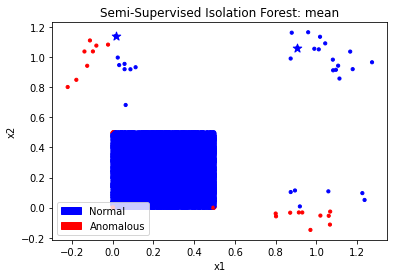

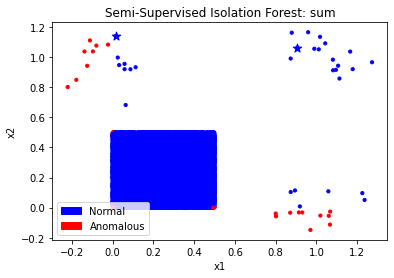

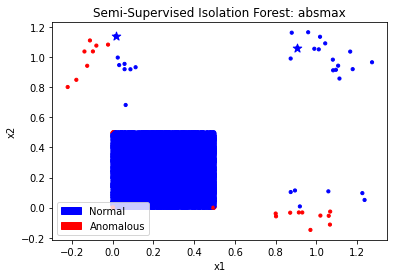

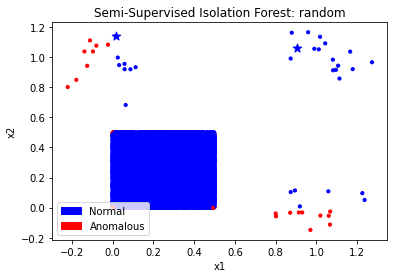

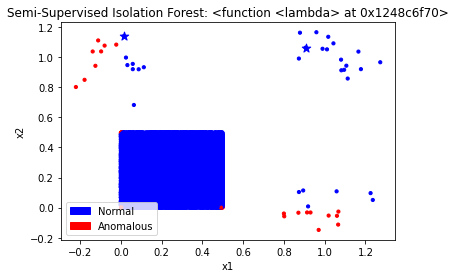

In [5]:
y = np.concatenate([np.zeros(n_inliers),
                    np.r_[-2, np.zeros(n_outliers-1)],
                    np.r_[-0.5, np.zeros(n_outliers-1)],
                    # np.zeros(n_outliers),
                    np.zeros(n_outliers)])

for label_reducer in ('mean', 'sum', 'absmax', 'random', lambda x: np.max(x)):
    ssi = SemiSupervisedIsolationForest(label_reducer=label_reducer, n_estimators=100, random_state=0, contamination=3 * n_outliers / x.shape[0])
    ssi.fit(x, y)

    plt.figure()
    plt.title(f'Semi-Supervised Isolation Forest: {label_reducer}')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.scatter(*x.T, c=[COLORS[l] for l in ssi.predict(x)], s=10)
    plt.scatter(*x[n_inliers:n_inliers+n_outliers+1:n_outliers, :].T, c='blue', s=80, marker='*')
    plt.legend(handles=[blue_patch, red_patch], loc='lower left')
